In [14]:
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

model = load_model('Regression/Models/1_lstm_V2_reg.h5')
btc_df = pd.read_hdf('Regression\Data\Testing\\testing_1_V4_reg.h5')
btc_df.index = btc_df.index.astype("int")
btc_df = btc_df.reset_index(drop=True)

#scaler = StandardScaler()
#scaler = scaler.fit(btc_df)
btc_df = btc_df.drop(["VWAP","Label"],axis=1)
#btc_df = btc_df.drop(["fft_5","fft_15","fft_50"], axis=1)
train_y = btc_df.pop("Target")
print(btc_df.shape[1])
plt.style.use('seaborn')



36


In [15]:
btc_df.columns

Index(['Count', 'Close', 'mean_trade', 'upper_Shadow', 'lower_Shadow',
       'shadow3', 'shadow5', 'mean1', 'UPS', 'LOS', 'LOGVOL', 'LOGCNT', 'Mean',
       'High/Mean', 'Low/Mean', 'Volume/Count', 'high2mean', 'low2mean',
       'volume2count', 'noise_mult', 'fft_5', 'fft_15', 'fft_50', 'MA_20',
       'MA_diff', 'Log_High', 'Log_Open', 'Log_Low', 'Log_Close', 'Minute',
       'Day', 'Month', 'Year', 'DayOfWeek', 'minute_seasonal',
       'correlation_log_perf'],
      dtype='object')

In [16]:
btc_target_label = train_y[:-16]
n_future = 1 #Naechste 15min prädizieren
n_past = 16
train_x = []
train_y = []
for i in range(n_past,len(btc_df)-n_future+1):
    train_x.append(btc_df.iloc[i-n_past:i, 0:btc_df.shape[1]])
train_x,train_y = np.array(train_x), np.array(btc_target_label)

In [26]:
train_x.shape

(489025, 16, 36)

In [17]:
trainPredict = model.predict(train_x)

In [5]:
trainPredict

array([[ 0.0031775 ],
       [ 0.0031775 ],
       [ 0.0031775 ],
       ...,
       [-0.0059476 ],
       [-0.006049  ],
       [-0.00601253]], dtype=float32)

In [6]:
import math
from sklearn.metrics import mean_absolute_error
trainScore = mean_absolute_error(train_y, trainPredict)
print(trainScore)

0.003713239904258092


In [30]:
btc_df_target = pd.read_hdf('Regression\Data\Testing\\testing_1_V1.h5')
btc_df_target["Target"].describe()

count    489041.000000
mean         -0.000011
std           0.002415
min          -0.072556
25%          -0.001071
50%          -0.000055
75%           0.000964
max           0.089280
Name: Target, dtype: float64

In [31]:

# shift train predictions for plotting
#trainPredictPlot = np.empty_like(btc_df)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[16:len(trainPredict)+16, :] = trainPredict

In [32]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(train_y, trainPredict)

ValueError: continuous format is not supported

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
trainPredict = np.around(trainPredict)

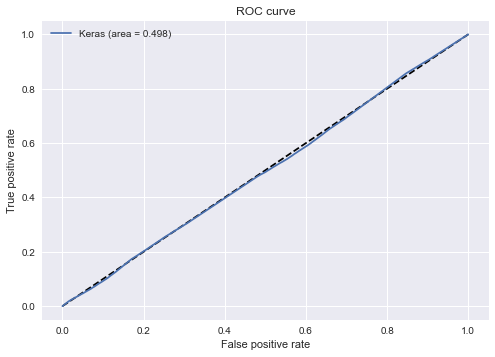

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [ ]:
confusion_matrix(train_y,trainPredict)

array([[   510, 236490],
       [   469, 251556]], dtype=int64)

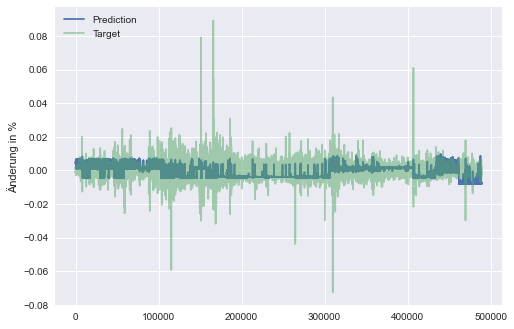

In [18]:

plt.plot(trainPredict,label="Prediction")
plt.plot(train_y,alpha=0.5,label="Target")
plt.legend (loc="upper left")
plt.ylabel("Änderung in %")
plt.show()

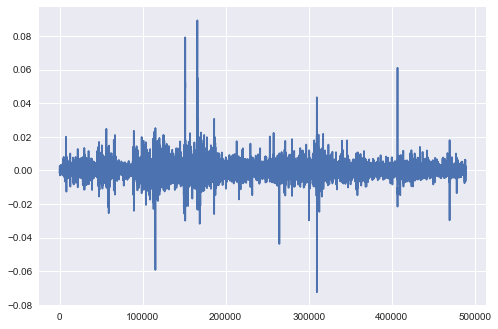

In [ ]:
plt.plot(train_y)

In [ ]:
diff = len(btc_df) - len(trainPredict)

In [ ]:
diff


16

In [ ]:
(btc_df.iloc[diff:,])

,Count,Volume,mean_trade,upper_Shadow,lower_Shadow,shadow3,shadow5,mean1,UPS,LOS,...,Log_Open,Log_Low,Log_Close,Minute,Day,Month,Year,DayOfWeek,minute_seasonal,correlation_log_perf
16,759.0,110.680245,0.145824,8.271808,10.270777,0.074736,0.092797,0.083766,8.271808,10.270777,...,0.000108,-0.000325,-0.079113,54,16,10,2020,4,0.005287,0.063516
17,738.0,67.854333,0.091944,9.445329,6.438952,0.139200,0.094894,0.117047,9.445329,6.438952,...,-0.000142,0.000326,0.027309,55,16,10,2020,4,0.000490,0.125450
18,1001.0,159.819220,0.159660,11.913815,6.357528,0.074546,0.039779,0.057163,11.913815,6.357528,...,0.000039,0.000046,0.102264,56,16,10,2020,4,0.002947,-0.073290
19,574.0,43.925532,0.076525,8.678333,5.978333,0.197569,0.136102,0.166835,8.678333,5.978333,...,-0.000014,0.000019,-0.047705,57,16,10,2020,4,0.008071,-0.017575
20,662.0,61.765683,0.093302,9.360000,7.411667,0.151540,0.119997,0.135768,9.360000,7.411667,...,0.000020,-0.000207,-0.139441,58,16,10,2020,4,0.000428,0.025037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489036,5680.0,226.506712,0.039878,57.445000,47.880000,0.253613,0.211384,0.232499,57.445000,47.880000,...,-0.002507,0.000018,1.526214,26,20,9,2021,0,-0.002125,-0.076843
489037,4344.0,203.675225,0.046887,31.290000,115.032500,0.153627,0.564784,0.359205,31.290000,115.032500,...,0.001369,-0.000203,0.015311,27,20,9,2021,0,-0.001305,0.036299
489038,5009.0,200.178351,0.039964,76.268750,27.646250,0.381004,0.138108,0.259556,76.268750,27.646250,...,0.000217,0.000502,-1.518654,28,20,9,2021,0,0.001300,-0.040182
489039,3160.0,120.113063,0.038010,25.407143,19.582416,0.211527,0.163033,0.187280,25.407143,19.582416,...,-0.001899,-0.000769,-0.784262,29,20,9,2021,0,0.004813,0.023430
